## Math 157: Intro to Mathematical Software
## UC San Diego, Winter 2020

## March 20, 2020: Algorithmic Bias in Machine Learning

##### Final Project by Ella Lucas

### Introduction

#### Machine Learning...

*Machine Learning* is a branch of computer science concerned with the application of algorithms and neural networks to improve computer systems.

Data drives the machine learning process. "Training data" applied to mathematical models summarizes trends to make decisions on "test data", or information that the model has not seen before.

Machine Learning was inspired by Donald Hebb's 1949 research on brain cell interaction. The concept "fire together wire together" referring to neural mechanisms of learning inspired the mathematics driving machine learning (like gradient descent) [1].

Within the constraints of our course, we studied Machine Learning via the Python module 'scikit-learn':

> Machine Learning in Python [18]
>
> - Simple and efficient tools for data mining and data analysis
> - Accessible to everybody, and reusable in various contexts
> - Built on NumPy, SciPy, and matplotlib
> - Open source, commercially usable - BSD license

In this notebook, skikit-learn will be used to demonstrate some examples of algorithmic bias in machine learning.

#### & its consequence: Algorithmic Bias

*Algorithmic Bias* described systematic and repeatable errors in a computer system that create unfair outcomes [2].

Modern technology is an asset to the human experience, however sophisticated tools meant to simulate the process of decision making have proven too good for their use cases. Applying machine learning to datasets that inadvertently reflect outdated legislation, social injustice, or subconscious bias results in a model that will perpetuate those themes when put to production. Machine learning is a specialized science, and as a result society is often unaware of the technicalities that drive the decision making process, and so it can be difficult to think critically about machine impartiality.

In lecture, we discussed common uses of machine learning and how they can reflect algorithmic bias when fed biased data [18]:

- Text inputs
   - spam filtering (downside: [can also be used to defeat spam filtering](https://www.usenix.org/legacy/event/leet08/tech/full_papers/nelson/nelson_html/))
   - machine translation (downside: [may reflect gender bias](https://www.fastcompany.com/3010223/google-translates-gender-problem-and-bing-translates-and-systrans))
   - chat bots (downside: [may reflect incivility](https://arstechnica.com/information-technology/2016/03/microsoft-terminates-its-tay-ai-chatbot-after-she-turns-into-a-nazi/))
- Graphical inputs
   - face detection (downside: [may reflect racial bias](https://www.youtube.com/watch?v=t4DT3tQqgRM))
- Sound inputs
   - speech-to-text (downside: [may discriminate based on accent](https://www.wired.com/2017/03/voice-is-the-next-big-platform-unless-you-have-an-accent/) or [based on gender](https://makingnoiseandhearingthings.com/2016/07/12/googles-speech-recognition-has-a-gender-bias/))
- Location inputs
   - augmented reality (downside: [may reflect racial bias in housing](http://www.usatoday.com/story/tech/news/2016/08/09/pokemon-go-racist-app-redlining-communities-color-racist-pokestops-gyms/87732734/))
- Situational inputs
   - recommendations (downside: [may reflect gender bias](https://phys.org/news/2016-09-gender-bias-algorithms.html))
   - online ads (downside: [may reflect racial bias](http://arxiv.org/ftp/arxiv/papers/1301/1301.6822.pdf))
   - crime prediction and prevention (downside: [may perpetuate racial disparities](https://www.sciencenews.org/blog/science-public/data-driven-crime-prediction-fails-erase-human-bias))
   - prison sentencing (downside: [may perpetuate racial disparaties](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing))
   - content aggregation (downside: [may facilitate political manipulation](https://www.theguardian.com/technology/2017/sep/06/facebook-political-ads-russia-us-election-trump-clinton))

This notebook will examine several of the above examples in depth, to see firsthand how biased data leads to biased decisions.

### Big Data
Open source datasets are widely avaliable, as we have seen via scikit-learn and R. Macro- and micro-data can be fit to statistical models that scale - and are used to determine outcomes that may be systematically less favorable to individuals belonging to a certain group.

The reality is, it all starts with data.

#### A Simple Example: Oscar Winners

It is important to acknowledge that we live in a biased world. Data that has been gathered from our world will contain those biases.

Let's examine a real-world dataset to see for ourselves, as well as dive into some theory on how bias can be identified and corrected in data.

We'll illustrate with a [Kaggle dataset](https://www.kaggle.com/fmejia21/demographics-of-academy-awards-oscars-winners) containing demographic information of Oscar winners since 1928.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

# Use Pandas to import .csv
Data = pd.read_csv("Oscars-demographics-DFE.csv", encoding='ISO-8859-2')

# Check Data
Data.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,birthplace,birthplace:confidence,date_of_birth,date_of_birth:confidence,race_ethnicity,...,award,biourl,birthplace_gold,date_of_birth_gold,movie,person,race_ethnicity_gold,religion_gold,sexual_orientation_gold,year_of_award_gold
0,670454353,False,finalized,3,2/10/15 3:45,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,Two Arabian Knights,Lewis Milestone,NaN,NaN,NaN,NaN
1,670454354,False,finalized,3,2/10/15 2:03,"Glasgow, Scotland",1.0,2-Feb-1886,1.0,White,...,Best Director,http://www.nndb.com/people/626/000042500/,NaN,NaN,The Divine Lady,Frank Lloyd,NaN,NaN,NaN,NaN
2,670454355,False,finalized,3,2/10/15 2:05,"Chisinau, Moldova",1.0,30-Sep-1895,1.0,White,...,Best Director,http://www.nndb.com/people/320/000043191/,NaN,NaN,All Quiet on the Western Front,Lewis Milestone,NaN,NaN,NaN,NaN
3,670454356,False,finalized,3,2/10/15 2:04,"Chicago, Il",1.0,23-Feb-1899,1.0,White,...,Best Director,http://www.nndb.com/people/544/000041421/,NaN,NaN,Skippy,Norman Taurog,NaN,NaN,NaN,NaN
4,670454357,False,finalized,3,2/10/15 1:48,"Salt Lake City, Ut",1.0,23-Apr-1894,1.0,White,...,Best Director,http://www.nndb.com/people/292/000044160/,NaN,NaN,Bad Girl,Frank Borzage,NaN,NaN,NaN,NaN


As you can see based on the column headers, this dataset contains a significant amount of demographic information on past Oscar winners.

This information is factual.

We will see shortly that the data reflects the fact that certain demographics have been historically more likely to win an Oscar than others.

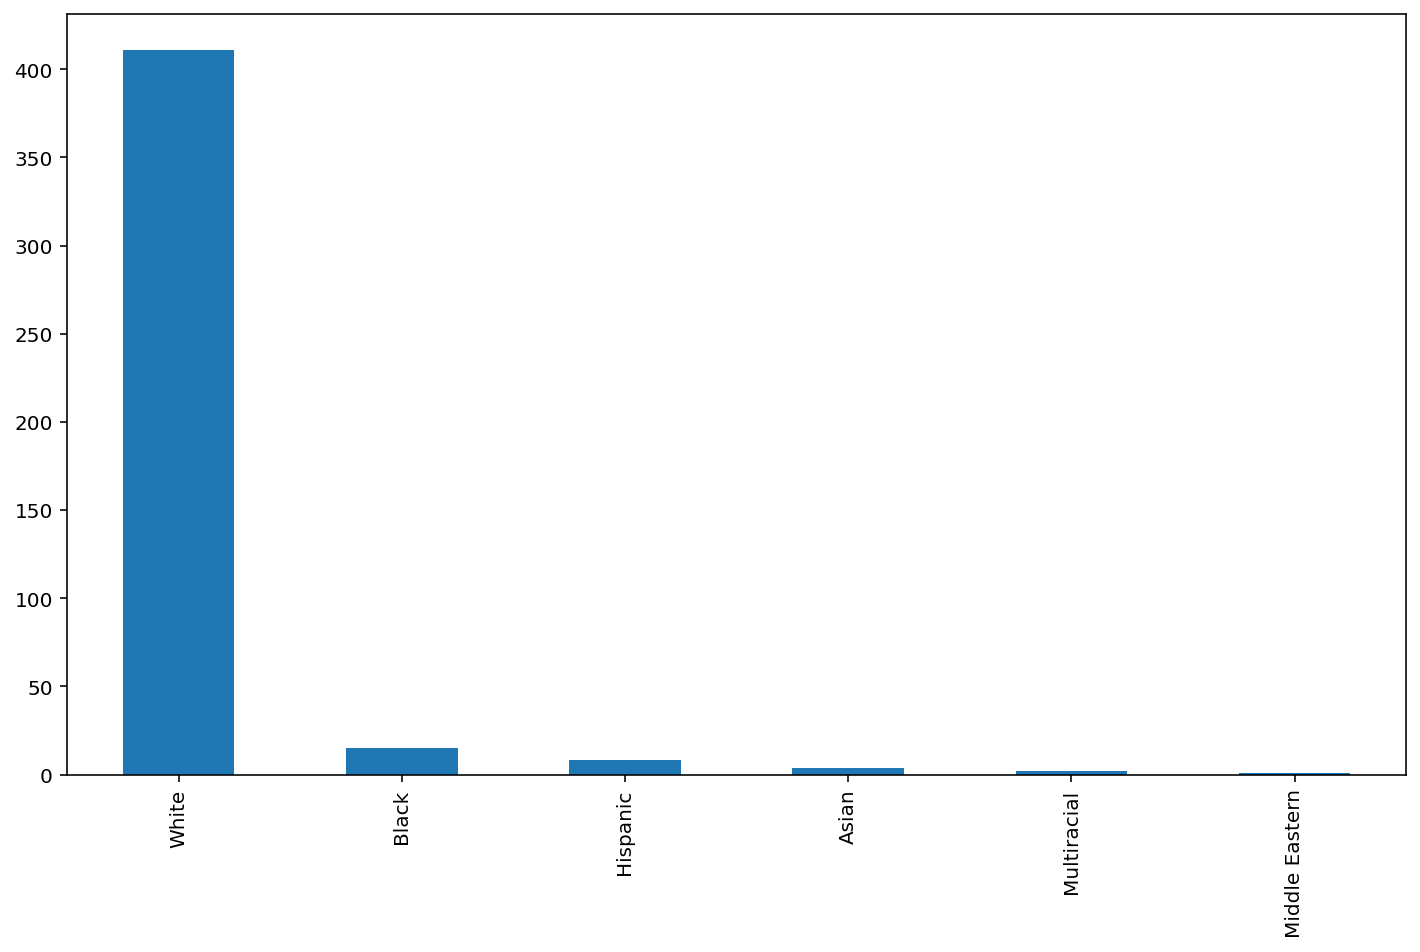

In [2]:
# Bar plot showing race representation in Oscar award winners
Data["race_ethnicity"].value_counts().plot(kind='bar')

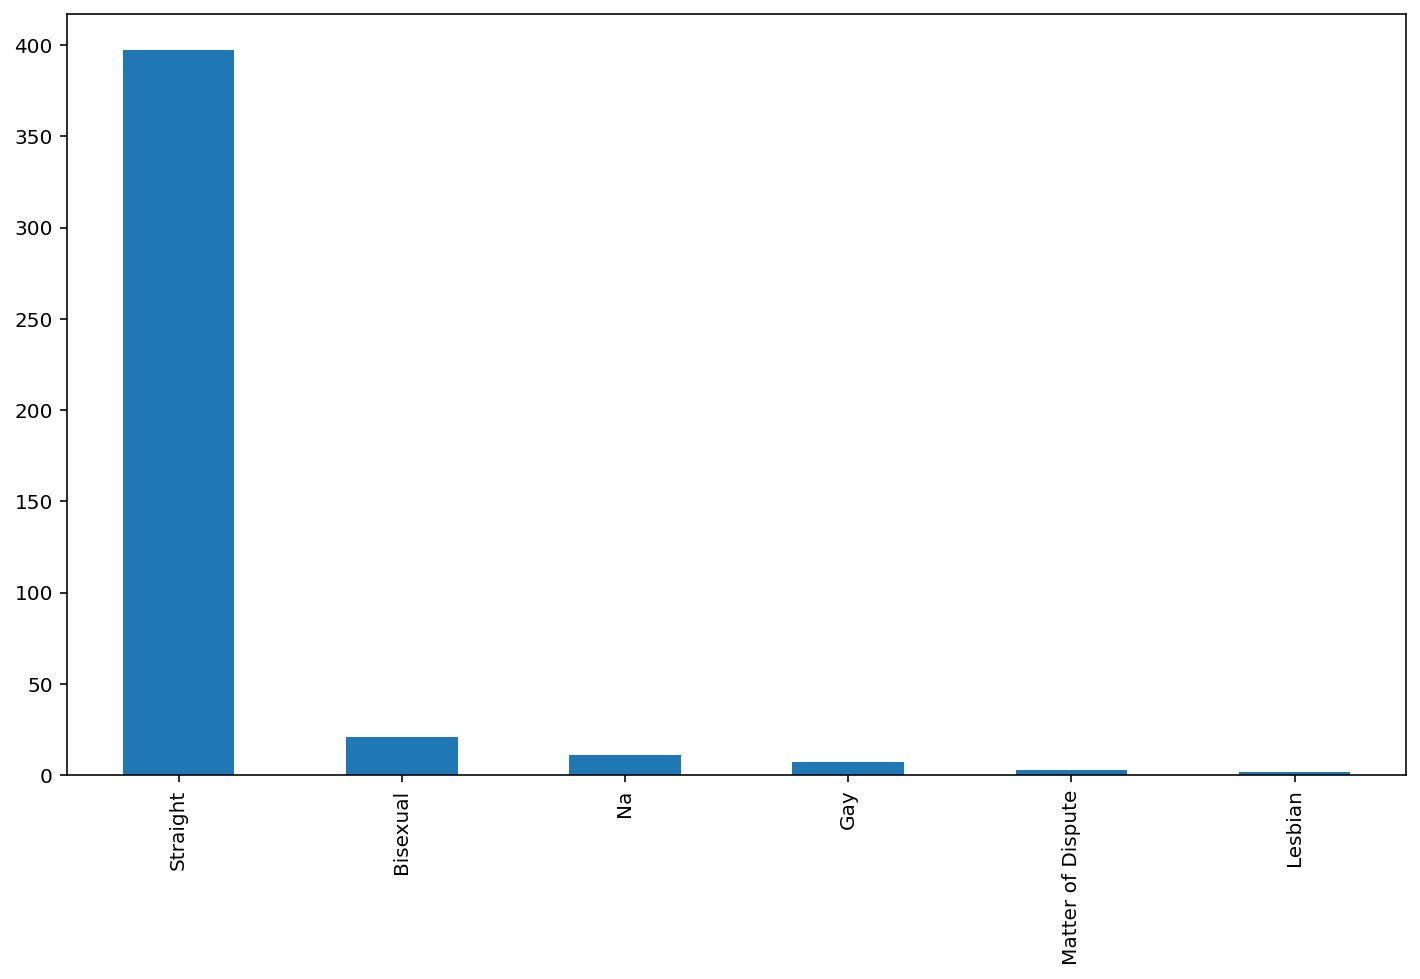

In [3]:
# What about sexual orientation?
Data["sexual_orientation"].value_counts().plot(kind='bar')

It is obvious that the vast majority of the historical recipiants of Oscar awards have identified themselves as white and straight. This is an example of data that represents the reality of one very specific institution of the complex society that we live in: the Oscar Awards. Obtaining an Oscar is a very prestigious honor for actors/actresses and filmmakers, and is certainly a metric of success in their field.

Now imagine that you are the casting director for a new film that is to be produced by a major studio. You have the budget to hire the best of the best, so that is what you aim to do.

A statistical model could be trained on this dataset to extract features that are correlated with a high success rate, determined by obtaining an Oscar. You could then apply this model to your pool of potential candiadates, and the algorithm would output candidates whose demographic information matches most closely with demographics of those who have won an oscar.

Since the original dataset lacks demographic diversity, it will induce bias on the models output and recommend majority straight white candidates, discarding others since the data is skewed so strongly to this demographic.

In reality, and in responsible science, *correlation != causation*, and making hiring decisions based on historical data will reflect historical inclusions or exclusions.

#### Managing Bias in Data
Google researchers propose a method for [identifying and correcting bias in machine learning](https://arxiv.org/pdf/1901.04966v1.pdf). We will briefly explore the theory to better understand how bias occurs in data and one way that we can continue to harness the power of machine learning despite the inevidability of biased data.

Main idea: A biased dataset can be perceived by the classifier to be unbiased, yet manipulated by a biased agent. The biased data is then re-weighted to fit the theoretical unbiased data and only then is fed to a machine learning algorithm as training data.

Assumptions: Existence of underlying unbiased labels that are overwritten by agent who intends to provide accurate labels but may have unconscious bias against certain groups.

Results: Showed training on re-weighted data corresponds to training on underlying unbiased labels, resulting in an unbiased classifier.

Metrics to assess bias in algorithms:
1. **Demographic parity**: Classifier should make positive predictions on a protected population group at the same rate as the entire population.
2. **Disparate impact**: Same idea as demographic parity except classifier does not know which protected population groups exist and which data points relate to such protected groups.
3. **Equal opportunity**: Classifier should have equal true positive rates on protected population group as those of the entire population.
4. **Equalized odds**: Classifier should have both equal true positive and false positive rate on a protected population group as those of the entire population.
Each metric exists as a positive number describing how close the algorithm is to "full fairness" (0).

The mathematical bias correction framework involves penalizing the impact of biased samples via [*Lagrange multipliers*]('https://en.wikipedia.org/wiki/Lagrange_multiplier'). The function receives some pre-determined "fairness constants" (ie: women should be hired at the same rate as men) as input and uses them to influence the loss in the training algorithm.

Lagrage multipliers find local maximums and minimums of a function subject to the condition that one or more equations have to be satisfied exactly by the chosen values of the variables. This allows for optimization without explicit parameterization of contstraints, making it a great candidate to combat bias in data.

Lagrangian function:
$$ L(x,\lambda) = f(x) + \lambda g(x)$$

Google's Bias Correction Framework:
$$ y_t(y|x)\ \alpha\ y_b (y|x)\ \cdot exp\ \{ \sum_{k=1}^{k} \lambda_k c_k (x,y) \}, for\ some\ \lambda_1, ..., \lambda_k\ \epsilon\ \R$$

$$ \boldsymbol{y_t}\ is\ the\ theoretically\ unbiased\ dataset $$
$$ \boldsymbol{y_b} is\ the\ biased\ dataset $$
$$ \boldsymbol{\lambda_k}\ are\ the\ learned\ values\ representing\ the\ connection\ between\ the\ unbiased\ and\ biased\ datasets.\ These\ values\ are\ used\ by\ the\ optimizer\ to\ calculate\ how\ much\ (or\ how\ little)\ each\ training\ sample\ should\ be\ weighted. $$

The algorithm receives the weights and data as input and uses both to train the unbiased classifier.

### Algorithms
Any machine learning algorithm is suseptible to bias based on the data that it is trained on. In class, we discussed Support Vector Machines (SVM) and clustering algorithms, although there are many algorithms that can be applied to solve machine learning problems.

Cathy O'Neil describes algorithms as catalysts of Widespread Mysterious Destruction (WMD) due to the prevelent belief that they are inherently objective, and the lack of understanding of how they arrive at their conclusions.

Next, we will discuss several complex real-world situations where algorithmic bias influenced outcomes in a serious way. With these examples in mind, we will learn more about the ML project flow by working through related examples.

#### Politics: Campaign Ad Spend

Machine learning can present politically-charged propoganda to third parties without their explicit knowledge or consent. This example of algorithmic bias occured in the 2016 US presidential election. Russia paid for political ads pushing specific views on polarized topics to appear on Facebook. This situation was controversial because the techniques used by the interveining party were often subtle and deceptive.

Audience-specific campaigns drive results. Therefore, it is essential that we are aware of how algorithms choose who to show what politically charged information.

To demonstrate this idea on a smaller scale, we can apply Logistic Regression to open-source data that contains the total amount of money spent on an election campain and whether that candidate won their election or not. This will give us a better idea of how ad spend might (or might not) influence outcomes. We'll also familiarize ourselves with the machine learning pipeline along the way.

[This dataset]('https://www.kaggle.com/danerbland/electionfinance') from Kaggle will provide the information we need.

In [4]:
# Import data
Election_df = pd.read_csv('CandidateSummaryAction1.csv')
Election_df

,can_id,can_nam,can_off,can_off_sta,can_off_dis,can_par_aff,can_inc_cha_ope_sea,can_str1,can_str2,can_cit,...,cas_on_han_beg_of_per,cas_on_han_clo_of_per,net_con,net_ope_exp,deb_owe_by_com,deb_owe_to_com,cov_sta_dat,cov_end_dat,winner,votes
0,H2GA12121,"ALLEN, RICHARD W",H,GA,12.0,REP,INCUMBENT,2237 PICKENS RD,NaN,AUGUSTA,...,"$60,109.57","$175,613.35","$1,074,949.50","$907,156.21","$1,125,000.00",NaN,1/1/2015,10/19/2016,Y,158708.0
1,H6PA02171,"EVANS, DWIGHT",H,PA,2.0,DEM,CHALLENGER,PO BOX 6578,NaN,PHILADELPHIA,...,NaN,"$105,687.23","$1,406,719.06","$1,298,831.83",NaN,NaN,11/2/2015,10/19/2016,Y,310770.0
2,H6FL04105,"RUTHERFORD, JOHN",H,FL,4.0,REP,OPEN,3817 VICKERS LAKE DRIVE,NaN,JACKSONVILLE,...,NaN,"$35,645.09","$650,855.38","$656,210.29","$60,000.00",NaN,4/1/2016,10/19/2016,Y,286018.0
3,H4MT01041,"ZINKE, RYAN K",H,MT,0.0,REP,INCUMBENT,409 2ND ST W,NaN,WHITEFISH,...,"$83,815.78","$399,122.61","$4,938,943.74","$5,055,942.15",NaN,NaN,1/1/2015,10/19/2016,Y,280476.0
4,H8CA09060,"LEE, BARBARA",H,CA,13.0,DEM,INCUMBENT,"409 13TH ST, 17TH FL",NaN,OAKLAND,...,"$83,690.60","$181,338.23","$1,197,676.61","$949,488.98","$4,401.75",NaN,1/1/2015,10/19/2016,Y,277390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809,P60005931,"BUTTOCKS, SYDNEYS VOLUPTOUS",P,US,0.0,IND,OPEN,143 HIGHLAND AVENUE,NaN,BUFFALO,...,"$5,000.00","$5,000.00",NaN,NaN,NaN,NaN,3/3/2015,3/31/2015,NaN,NaN
1810,S6CA00568,"MOLNAR, ROBERT",S,CA,0.0,REP,OPEN,PO BOX 321231,NaN,LOS GATOS,...,"$1,000.00",NaN,"$1,000.00","$1,000.00",NaN,NaN,1/1/2015,3/31/2015,NaN,NaN
1811,S6MD03524,"HOLMES, GREGORY",S,MD,0.0,REP,OPEN,13601 MACDERNUT CT,NaN,UPPER MARLBORO,...,NaN,NaN,NaN,NaN,NaN,NaN,8/29/2017,2/1/2015,NaN,NaN
1812,H6AS00031,"HUNKIN-FINAU, VAITINASA SALU",H,AS,NaN,DEM,NaN,PO BOX 252 VAILOAUTA,NaN,PAGO PAGO,...,"$1,058.44","$4,561.00","$41,670.00","$38,167.44",NaN,NaN,7/1/2016,10/19/2016,NaN,NaN


In [5]:
# Keep only the candidate's name, total amount spent campaigining, and election result
Election_df1 = Election_df[['net_con','winner']]
Election_df1

,net_con,winner
0,"$1,074,949.50",Y
1,"$1,406,719.06",Y
2,"$650,855.38",Y
3,"$4,938,943.74",Y
4,"$1,197,676.61",Y
...,...,...
1809,NaN,NaN
1810,"$1,000.00",NaN
1811,NaN,NaN
1812,"$41,670.00",NaN


In [6]:
# Preprocessing

# Replace binary Y/N to 1/0
# Column 'winners' contains 'Y' for winning campaigns and "" for losing campaigns. (From Kaggle Data page)
Election_df1 = Election_df1.replace('Y',1)
Election_df1['winner'] = Election_df1['winner'].fillna(0)

# Strip '$',',','(',')' and drop Null values
Election_df1 = Election_df1.replace({'\$': '', ',':'',}, regex=True)
Election_df1 = Election_df1.dropna()
Election_df1['net_con'] = Election_df1['net_con'].str.replace('(','-').str.replace(')','').astype('float32')

Election_df1

,net_con,winner
0,1.074950e+06,1.0
1,1.406719e+06,1.0
2,6.508554e+05,1.0
3,4.938944e+06,1.0
4,1.197677e+06,1.0
...,...,...
1800,1.408580e+05,0.0
1803,2.502500e+04,0.0
1810,1.000000e+03,0.0
1812,4.167000e+04,0.0


In [7]:
# Partition Data
from sklearn.model_selection import train_test_split

def partition_data(data, train_percentage, feature_headers, target_header):

    # Split dataset into train and test
    train_x, test_x, train_y, test_y = train_test_split(data[feature_headers], data[target_header], train_size=train_percentage)

    return train_x, test_x, train_y, test_y

In [8]:
# Set values for partition
target_header = 'winner'
feature_headers = list(set(Election_df1.columns)-set([target_header]))

X = Election_df1.loc[:,Election_df1.columns != 'winner']
y = Election_df1.winner

train_x,test_x,train_y,test_y = partition_data(Election_df1,0.7,feature_headers,target_header)
print("Train_x Shape: ", train_x.shape)
print("Train_y Shape: ", train_y.shape)
print("Test_x Shape: ", test_x.shape)
print("Test_y Shape: ", test_y.shape)

Train_x Shape:  (1150, 1)
Train_y Shape:  (1150,)
Test_x Shape:  (493, 1)
Test_y Shape:  (493,)


In [9]:
Election_df1['winner']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1800    0.0
1803    0.0
1810    0.0
1812    0.0
1813    0.0
Name: winner, Length: 1643, dtype: float64

[*Logistic Regression*]('https://en.wikipedia.org/wiki/Logistic_regression') is a machine learning algorithm supported within the scikit-learn framework that uses a logistic function to model a binary dependent variable (in this case, win or lose depending on amount of $ spent campaigining.)

In [10]:
# Apply to algorithm: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
# View classification results
from sklearn.metrics import classification_report
pred_y = logreg.predict(test_x)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.73      0.99      0.84       359
         1.0       0.00      0.00      0.00       134

    accuracy                           0.72       493
   macro avg       0.36      0.50      0.42       493
weighted avg       0.53      0.72      0.61       493



Our linear classifier was able to correctly predict outcome based on expenditure ~74% of the time. We can infer that there is *some* correlation between expenditure and outcome, but there are certainly other factors at play here.

Election campaigns expenditure can be subtle with profound implications on outcome (such as Russia's interference in the 2016 election), or they may be variable (like we just saw from Kaggle's regional election data).

The reality is there are many factors to an election that contribute to whether or not a candidate gets elected.

Subtle intervention by a foreign party to influence decisions is an example of algorithmic bias through political manipulation. To see if domestic campain expenditure is directly correlated with outcome, we went through a standard machine learning pipeline (preprocess/partition/fit/analysis) using linear regression on Kaggle data.

Considering the results we obtained in analysis, the linear classifier did a decent job on the test data when it was tasked with determining a candidates outcome from net expenditure.

#### Gender Bias in Neural Machine Translation

In this example of real-world algorithmic bias, machine translation algorithms are suseptible to unintentionally providing sexist translations. For example, common nouns representing professions (doctor, teacher, nurse, engineer) may be attributed a gender. Specifically, when translating from English to another language, gender neutral words are assigned male pronouns at a higher frequency than female pronouns - *unless* the noun in question is associated with a normative female-gender stereotype.

How does this happen? Gender bias gets encoded in *word embeddings* (projection of words to vectors of real numbers), and like other examples of algorithmic bias we have seen, the bias is traced to the training data.

Bolukbasi et. al describe the technical process of bias in word embeddings in their paper [Man is to Computer Programmer as Woman is to Homemaker? Debiasing Word Embeddings]('https://arxiv.org/pdf/1607.06520.pdf'). In the example that follows, we will examine gender bias in [GloVe: Global Vectors for Word Representation]('https://www.kaggle.com/rtatman/glove-global-vectors-for-word-representation'), a Kaggle collection of pre-trained word vectors.

In [12]:
# Import data
embeddings_dict = {}
with open("glove.6B.50d.txt",'r',encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:],"float32")
        embeddings_dict[word] = vector

In [13]:
# Define tuples of gendered occupations based on those defined in Bulukbasi et. al.
male_occupations = ("maestro","skipper","protege","philosopher","architect", "financier", "warrior", "broadcaster", "magician", "pilot", "boss")
female_occupations = ("homemaker", "nurse", "receptionist", "librarian", "socialite",
"hairdresser", "nanny", "bookkeeper", "stylist", "housekeeper", "designer", "counselor")

In [14]:
# Isolate "he" and "she" vectors
he = embeddings_dict['he']
she = embeddings_dict['she']

We want to devise a way to compute the similarity function between a given word and a word embeddings contained in GloVe.

'find_closest_embeddings'
- *sorted* takes an iterable and sorts it using 'embeddings_dict.keys()', all possible words that we want to sort.
- Python would sort this list alphabetically. It is necessary to specify a 'key' to sort the list in a specific way. For this, we use a lambda function that takes a word as input and returns the euclidean distance (via scipy's function) between that word's embeddding and the given embedding.
- Output is the rank of all words by closeness to the given word.

In [15]:
# Compute word embedding similarity
from scipy import spatial

def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [16]:
# Now lets test out our function with some of the supposedly gender-biased occupations above

# Occupation: boss
find_closest_embeddings(embeddings_dict[male_occupations[-1]])[:10]

['boss',
 'bosses',
 'manager',
 'admits',
 'ferguson',
 'mourinho',
 'quits',
 'tony',
 'keegan',
 "o'neill"]

In [17]:
# Occupation: homemaker
find_closest_embeddings(embeddings_dict[female_occupations[0]])[:10]

['homemaker',
 'schoolteacher',
 'housewife',
 'hairdresser',
 'waitress',
 '42-year',
 '49-year',
 'pensioner',
 'seamstress',
 'businesswoman']

Try out our 'find_closest_embeddings' function with other words to see what implicit associations the model has extracted from its training data. From these two examples, we can see that the model associates 'boss' with generic male names such as 'ferguson', 'tony', and 'keegan', while the occupation homemaker returns female gendered associations such as 'housewife', 'seamstress', and 'businesswoman'.

Normative, socially-constructed gender roles are quickly learned by Machine Translation software and propagated in its results. In this example, we looked at the associative similarity between two words in English. The same pre-trained vectors that we worked with within the constraints of our language are used in different ways to translate between English and virtually any other language, so long as training data is avaliable. This means that it is essential to study our data and understand the associations learned by the algorithms we deploy.

### Conclusion
In [this TED Talk ](https://www.ted.com/talks/cathy_o_neil_the_era_of_blind_faith_in_big_data_must_end/up-next?language=en) Cathy O'Neil, author of "Weapons of Math Destruction", provides a four-step process for auditing the algotithms we use to make important decisions:

- **Step 1**: Check the integrety of training data.
- **Step 2**: Audit the definition of success.
- **Step 3**: Consider algorithmic accuracy by questioning its errors: For whom does the algorithmm fail and what are the consequences?
- **Step 4**: Consider the long-term effects of algorithms.

As long as we live in a biased world, the algorithms that we deploy to scale our decision-making process with contain those biases. It is our responsibility to do all that we can to increase computational transparency and mitigate adverse effects.

### Exercises

#### Problem 1: The Machine Learning Pipeline
In this exercise, you will be challenged to follow the machine learning pipeline outlined in the election data example on a new dataset to observe classification results.

1a. Load [diabetes]('https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes') from scikit-learn datasets module. Be sure that `return_X_y = True'.

1b. Our data contains 10 feature variables. We are interested in isolating only one feature. For preprocessing, please isolate `Body mass index` and partition the resulting data.

1c. Fit the data via linear regression. Plot a graph that visualizes the linear regression. Specifically, show how linear regression attempts to draw a straight line to minimize the residual sum of squares between the observed responses in the data and the responses predicted by the linear approximation.

1d. *Algorithmic bias* is a relevant concern with health data. Please explain how the results of the linear regression model fit to data representing the correlation between BMI and diabetes cases could be used to draw irresponsible conclusions when applied to society at large.

#### Problem 2: Identifying Algorithmic Bias in Big Data

Refer to the Conclusion of this presentation, and watch the linked TED Talk by Cathy O'Neil. In this exercise, you will work through the four-step process she describes on how we can audit the algorithms that we deploy in machine learning to aid the human decision making process.

2a. Please describe three ways you can check the integrety of training data before fitting it to a model (no code necessary, although your process should be computationally feasible.)

2b. Consider the real-world machine learning problem of facial recognition and "audit the definition of algorithmic success" for this task.

2c. Anticipate potential long-term effects of facial recognition software becoming increasinly prevelant in governmental agencies (ie: policing).

### Solutions

#### Probelm 1 Solution
In this exercise, you will be challenged to follow the machine learning pipeline outlined in the election data example on a dataset of your choice to observe classification results.

1a. Load the [diabetes]('https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn.datasets.load_diabetes') from scikit-learn datasets module. Be sure that `return_X_y = True'.

In [0]:
from sklearn import datasets

diabetes_X,diabetes_y = datasets.load_diabetes(return_X_y=True)

1b. Our data contains 10 feature variables. We are interested in isolating only one feature. For preprocessing, please isolate `Body mass index` and partition the resulting data.

In [0]:
# Isolate BMI
diabetes_X = diabetes_X[:,np.newaxis,2]

# Split data
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

1c. Fit the data via linear regression. Plot a graph that visualizes the linear regression. Specifically, show how linear regression attempts to draw a straight line to minimize the residual sum of squares between the observed responses in the data and the responses predicted by the linear approximation.

In [0]:
from sklearn import linear_model
from sklearn.metrics import classification

# Fit to data
clf = linear_model.LinearRegression()
clf.fit(diabetes_X_train,diabetes_y_train)

# Plot outputs
diabetes_y_pred = clf.predict(diabetes_X_test)

plt.scatter(diabetes_X_test,diabetes_y_test, color='black')
plt.plot(diabetes_X_test,diabetes_y_pred)
plt.show()

1d. *Algorithmic bias* is a relevant concern with health data. Please explain how the results of the linear regression model fit to data representing the correlation between BMI and diabetes cases could be used to draw irresponsible conclusions when applied to society at large.

(Open ended question) In the preprocessing step of the machine learning pipeline, we extracted one feature (BMI) from the rest for our analysis. It would be irresponsible for a health professional to use this regression model to aid in diagnostics of diabetes since it is only considering BMI as a contributing factor. Therefore, this model would contain a certain amount of bias when applied to make decisions about the real world.

#### Problem 2 Solution

Refer to the Conclusion of this presentation, and watch the linked TED Talk by Cathy O'Neil. In this exercise, you will work through the four-step process she describes on how we can audit the algorithms that we deploy in machine learning to aid the human decision making process.

2a. Please describe three ways you can check the integrety of training data before fitting it to a model (no code necessary, although your process should be computationally feasible.)

1. Ensure that historical data is not missing relevant time periods.
2. Diverse demographic data is necessary to model our diverse society. Discard training data that is not representative of the population it is intended to model.
3. Apply bias correction framework to dataset.

2b. Consider the real-world machine learning problem of facial recognition and "audit the definition of algorithmic success" for this task.

Facial recognition systems work by mapping facial features and comparing information with a database of known faces. Success is determined by correct classification, which involves matching features to known features.

Auditing this definition of success, one potential pitfall to point out is that correct classification will be highly dependent on a diverse training dataset, otherwise minority groups would experience classification failure at a much higher rate.

2c. Anticipate potential long-term effects of facial recognition software becoming increasinly prevelant in governmental agencies (ie: policing).

If we do not obtain and utilize more diverse sets of training data, then our facial recognition software will remain biased. If governmental agencies begin to use these systems at scale, they will disproportionately recognize some groups over others, which is problematic because depending on how and where they are used, this could initiate a feedback loop of biased data.

### References
- [1] History of Machine Learning: https://www.dataversity.net/a-brief-history-of-machine-learning/#
- [2] Algorithmic Bias: https://en.wikipedia.org/wiki/Algorithmic_bias
- [3] Lagrange Multipliers: https://en.wikipedia.org/wiki/Lagrange_multiplier
- [4] Election Finances Dataset: https://www.kaggle.com/danerbland/electionfinance
- [5] Oscars Demographics Dataset: https://www.kaggle.com/fmejia21/demographics-of-academy-awards-oscars-winners
- [6] ID & Correcting Label Bias Paper: https://arxiv.org/pdf/1901.04966v1.pdf
- [7] ID & Correcting Label Bias Tutorial: https://towardsdatascience.com/identifying-and-correcting-label-bias-in-machine-learning-ed177d30349e
- [8] Debiasing Word Embeddings: https://arxiv.org/pdf/1607.06520.pdf
- [9] GloVe dataset: https://www.kaggle.com/rtatman/glove-global-vectors-for-word-representation
- [10] GloVe vectors tutorial: https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db
- [11] scikit-learn docs: http://scikit-learn.org/stable/
- [12] pandas docs: https://pandas.pydata.org/docs/
- [13] python docs: https://docs.python.org/3/
- [14] Matplotlib docs: https://matplotlib.org/3.1.1/contents.html
- [15] SciPy docs: https://www.scipy.org/docs.html
- [16] Linear Regression Diabetes Tutorial: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
- [17] Cathy O'Neil TED Talk: https://www.ted.com/talks/cathy_o_neil_the_era_of_blind_faith_in_big_data_must_end/up-next?language=en
- [18] Math 157 Lecture 2/28/2020: Machine Learning via Scikit-Learn